In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

summer_analytics_mid_hackathon_path = kagglehub.competition_download('summer-analytics-mid-hackathon')

print('Data source import complete.')


In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
df #ignore the warnings

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [ ]:
df['class'].value_counts()

class
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate the forest class and other classes
forest = df[df['class'] == 'forest']
non_forest = df[df['class'] != 'forest']

# Downsample the forest class
forest_downsampled = resample(forest,
                              replace=False,   # Sample without replacement
                              n_samples=841,   # Match the size of the 'farm' class
                              random_state=42) # Reproducibility

# Combine the downsampled forest with the rest
df = pd.concat([forest_downsampled, non_forest])
df['class'].value_counts()

class
forest        841
farm          841
impervious    669
grass         196
water         105
orchard        30
Name: count, dtype: int64

<Axes: >

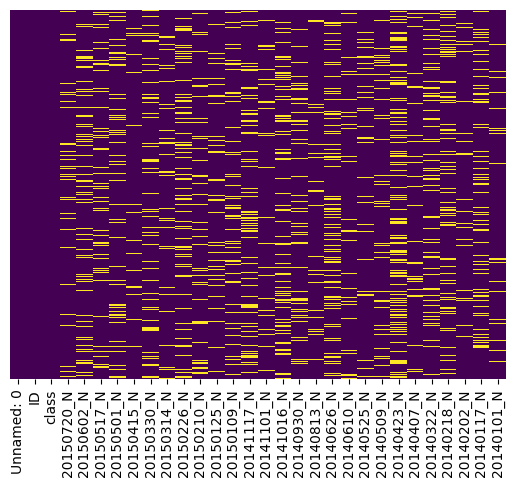

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
col = [i for i in df.columns if i not in ['ID', 'class']]

#iterative_imputer = IterativeImputer()
#df[col] = iterative_imputer.fit_transform(df[col])



df[col] = df[col].interpolate()

<Axes: >

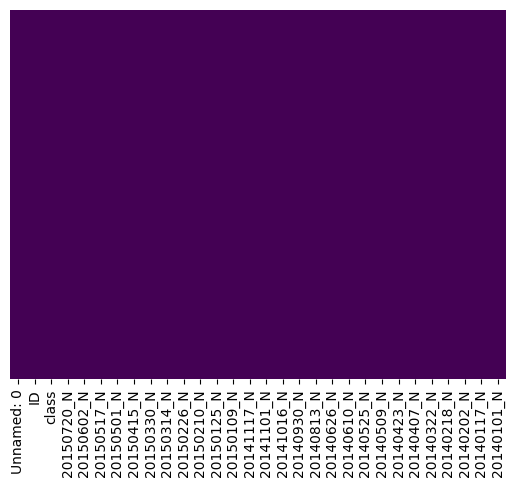

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iterative_imputer = IterativeImputer()
df[col] = iterative_imputer.fit_transform(df[col])

In [ ]:
df

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
2309,2887.0,2888,forest,7741.50,7988.09,7734.310,6481.66,2882.920,5298.769164,3346.190,...,4298.560,4085.01,2877.310000,1545.240000,4867.060,1603.080,5927.980,6282.240,6744.260,2975.236706
6079,7409.0,7410,forest,7998.90,7853.72,2802.580,3816.22,7612.940,1104.950000,2229.830,...,1406.430,6579.24,7160.290000,6177.610000,514.485,4021.400,604.034,7990.230,946.000,8123.190000
6003,7316.0,7317,forest,6844.47,5405.93,3377.220,5752.08,506.288,1545.340000,1113.470,...,2448.440,1083.98,7281.276667,5799.930000,2086.210,1340.220,3522.680,5985.890,4859.410,2523.670000
5368,6548.0,6549,forest,7968.62,6156.16,1907.700,8364.64,3882.769,4493.705000,957.664,...,7996.820,7053.57,7402.263333,5422.250000,340.970,2352.620,2391.325,6411.030,697.088,572.902000
5050,6165.0,6166,forest,7912.63,6946.70,505.227,2392.67,7259.250,7442.070000,3772.720,...,3233.340,6192.97,7523.250000,5044.570000,308.135,7533.030,1259.970,7057.100,1057.780,7929.580000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537.0,10538,impervious,1207.70,984.62,886.685,1166.25,937.478,1072.700000,823.896,...,1117.740,1176.60,1044.110000,4317.543333,369.082,465.843,362.882,979.795,1294.397,433.659000
7996,10538.0,10539,impervious,2170.35,1419.72,1361.000,1478.71,983.911,1262.110000,1422.860,...,984.634,2128.97,1379.660000,2754.186667,762.633,485.204,446.724,771.747,1589.060,506.936000
7997,10541.0,10542,impervious,1895.68,1454.74,887.206,1033.56,1930.380,1057.150000,1471.600,...,888.408,2093.02,1232.110000,1190.830000,1441.460,1170.880,1095.000,1818.650,2501.720,1247.770000
7998,10542.0,10543,impervious,3465.74,1283.32,413.412,4391.05,1146.820,4473.050000,1614.750,...,5833.760,4047.32,4515.800000,433.177000,277.296,744.143,1095.000,3759.710,1875.715,388.346000


In [ ]:
numeric_columns = df.select_dtypes(include=['float64']).columns

<Axes: xlabel='class', ylabel='20150720_N'>

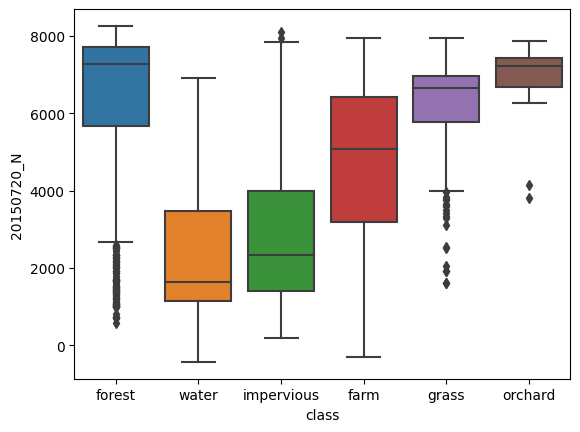

In [ ]:
sns.boxplot(x='class', y='20150720_N', data=df)

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')

In [ ]:
#def process_group(group):
#    for col in numeric_columns:
#        q1 = group[col].quantile(0.25)
#        q3 = group[col].quantile(0.75)
#        iqr = q3 - q1
#        lower_bound = q1 - 1.5 * iqr
#        upper_bound = q3 + 1.5 * iqr
#
#        group[col] = group[col].apply(lambda x: max(lower_bound, min(x, upper_bound)))
#    return group

#df = df.groupby('class').apply(process_group)
#df
#ignore warnings

In [ ]:
#df = df.rename(columns={"class": "class_original"})
#df = df.reset_index()
#df = df.drop(['class', 'level_1'], axis=1)
#df = df.rename(columns={"class_original": "class"})
#df

<Axes: xlabel='class', ylabel='20150720_N'>

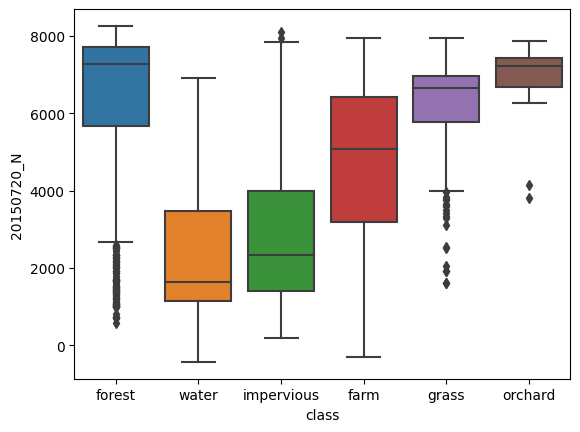

In [ ]:
sns.boxplot(x='class', y='20150720_N', data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2682 entries, 2309 to 7999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2682 non-null   float64
 1   ID          2682 non-null   int64  
 2   class       2682 non-null   object 
 3   20150720_N  2682 non-null   float64
 4   20150602_N  2682 non-null   float64
 5   20150517_N  2682 non-null   float64
 6   20150501_N  2682 non-null   float64
 7   20150415_N  2682 non-null   float64
 8   20150330_N  2682 non-null   float64
 9   20150314_N  2682 non-null   float64
 10  20150226_N  2682 non-null   float64
 11  20150210_N  2682 non-null   float64
 12  20150125_N  2682 non-null   float64
 13  20150109_N  2682 non-null   float64
 14  20141117_N  2682 non-null   float64
 15  20141101_N  2682 non-null   float64
 16  20141016_N  2682 non-null   float64
 17  20140930_N  2682 non-null   float64
 18  20140813_N  2682 non-null   float64
 19  20140626_N  2682 non-null   f

In [ ]:
df

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
2309,2887.0,2888,forest,7741.50,7988.09,7734.310,6481.66,2882.920,5298.769164,3346.190,...,4298.560,4085.01,2877.310000,1545.240000,4867.060,1603.080,5927.980,6282.240,6744.260,2975.236706
6079,7409.0,7410,forest,7998.90,7853.72,2802.580,3816.22,7612.940,1104.950000,2229.830,...,1406.430,6579.24,7160.290000,6177.610000,514.485,4021.400,604.034,7990.230,946.000,8123.190000
6003,7316.0,7317,forest,6844.47,5405.93,3377.220,5752.08,506.288,1545.340000,1113.470,...,2448.440,1083.98,7281.276667,5799.930000,2086.210,1340.220,3522.680,5985.890,4859.410,2523.670000
5368,6548.0,6549,forest,7968.62,6156.16,1907.700,8364.64,3882.769,4493.705000,957.664,...,7996.820,7053.57,7402.263333,5422.250000,340.970,2352.620,2391.325,6411.030,697.088,572.902000
5050,6165.0,6166,forest,7912.63,6946.70,505.227,2392.67,7259.250,7442.070000,3772.720,...,3233.340,6192.97,7523.250000,5044.570000,308.135,7533.030,1259.970,7057.100,1057.780,7929.580000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537.0,10538,impervious,1207.70,984.62,886.685,1166.25,937.478,1072.700000,823.896,...,1117.740,1176.60,1044.110000,4317.543333,369.082,465.843,362.882,979.795,1294.397,433.659000
7996,10538.0,10539,impervious,2170.35,1419.72,1361.000,1478.71,983.911,1262.110000,1422.860,...,984.634,2128.97,1379.660000,2754.186667,762.633,485.204,446.724,771.747,1589.060,506.936000
7997,10541.0,10542,impervious,1895.68,1454.74,887.206,1033.56,1930.380,1057.150000,1471.600,...,888.408,2093.02,1232.110000,1190.830000,1441.460,1170.880,1095.000,1818.650,2501.720,1247.770000
7998,10542.0,10543,impervious,3465.74,1283.32,413.412,4391.05,1146.820,4473.050000,1614.750,...,5833.760,4047.32,4515.800000,433.177000,277.296,744.143,1095.000,3759.710,1875.715,388.346000


In [ ]:
df['mean_ndvi'] = df.drop('class', axis =1).mean(axis=1)
df['median'] = df.drop(['mean_ndvi', 'class'], axis=1).median(axis=1)
df['std'] = df.drop(['mean_ndvi', 'median', 'class'], axis=1).std(axis=1)

<Axes: >

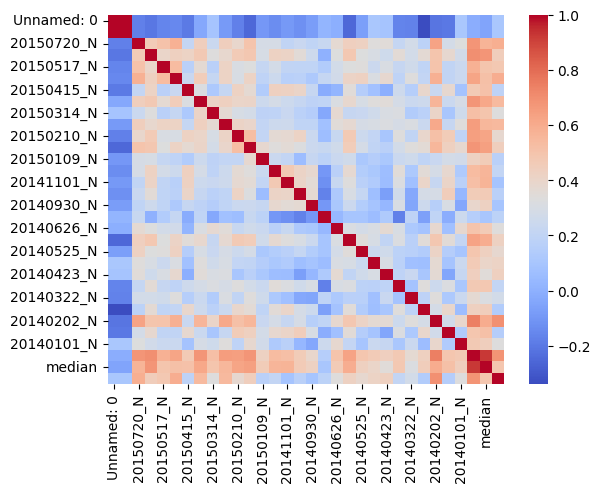

In [ ]:
sns.heatmap(df.drop('class', axis =1).corr(), cmap='coolwarm')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2682 entries, 2309 to 7999
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2682 non-null   float64
 1   ID          2682 non-null   int64  
 2   class       2682 non-null   object 
 3   20150720_N  2682 non-null   float64
 4   20150602_N  2682 non-null   float64
 5   20150517_N  2682 non-null   float64
 6   20150501_N  2682 non-null   float64
 7   20150415_N  2682 non-null   float64
 8   20150330_N  2682 non-null   float64
 9   20150314_N  2682 non-null   float64
 10  20150226_N  2682 non-null   float64
 11  20150210_N  2682 non-null   float64
 12  20150125_N  2682 non-null   float64
 13  20150109_N  2682 non-null   float64
 14  20141117_N  2682 non-null   float64
 15  20141101_N  2682 non-null   float64
 16  20141016_N  2682 non-null   float64
 17  20140930_N  2682 non-null   float64
 18  20140813_N  2682 non-null   float64
 19  20140626_N  2682 non-null   f

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Drop ID column
df.drop(columns=['ID'], inplace=True)

# Encode class column (if it's categorical)
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Split into features and target
X = df.drop(columns=['class'])
y = df['class']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:




# Fit multinomial logistic regression
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=10000,
    class_weight='balanced'
)
model.fit(X, y)


LogisticRegression(class_weight='balanced', max_iter=10000,
                   multi_class='multinomial')

In [ ]:
hacktest = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv')
hacktest['mean_ndvi'] = hacktest.mean(axis=1)
hacktest['median'] = hacktest.drop('mean_ndvi', axis=1).median(axis=1)
hacktest['std'] = hacktest.drop(['mean_ndvi', 'median'], axis=1).std(axis=1)

In [ ]:
hacktest.drop(columns=['ID'], inplace=True)
y_pred = model.predict(hacktest)

y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 2, 2, 2])

In [ ]:
y_pred_original = label_encoder.inverse_transform(y_pred)

In [ ]:
submission = pd.DataFrame({'class': y_pred_original})
submission.to_csv('new-submission.csv')

In [ ]:
#from sklearn import metrics
#metrics.confusion_matrix(y_test, y_pred)

In [ ]:
#y_test

In [ ]:
set(X_train.columns) == set(hacktest.columns)

NameError: name 'X_train' is not defined

In [ ]:
# Drop ID column


